In [ ]:
# Importing necessary libraries for data processing, analysis, and evaluation.
import os
import google.generativeai as genai
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Defining a function `email_analyzer` that takes a text input (`txt`) and analyzes it using a fine-tuned Generative AI model.
def email_analyzer(txt):
    # Retrieving the API key for Google Generative AI from the environment variables.
    # This key is required for authenticating with the Generative AI service.
    api_key = os.getenv("GENAI_API_KEY")
    
    # Configuring the Generative AI library with the retrieved API key.
    # This ensures that all requests made in this session are authenticated.
    genai.configure(api_key=api_key)

    # Defining the configuration for the generative model.
    # These parameters control how the model generates responses.
    generation_config = {
        "temperature": 0.1,  # Controls randomness in the output; lower values produce more deterministic results.
        "top_p": 0.95,      # Nucleus sampling: only considers tokens with cumulative probability <= top_p.
        "top_k": 40,        # Top-k sampling: only considers the top_k tokens with the highest probabilities.
        "max_output_tokens": 100,  # Specifies the maximum number of tokens (words, punctuation, etc.) in the output.
        "response_mime_type": "text/plain",  # Ensures that the response is in plain text format.
    }

    # Initializing a generative model instance with a fine-tuned model.
    # Replace "tunedModels/finetunedata-kqn02hc20o4y" with the specific name of your fine-tuned model.
    model = genai.GenerativeModel(
        model_name="tunedModels/finetunedata-kqn02hc20o4y",  # Fine-tuned model identifier.
        generation_config=generation_config,  # Configuration dict controlling the model's behavior.
    )

    # Starting a new chat session with the generative model.
    # The `history` parameter provides context for the conversation but is empty here for a fresh start.
    chat_session = model.start_chat(
        history=[]  # No prior conversation history is provided.
    )

    # Sending the provided text (`txt`) to the model and receiving its response.
    # The model processes the input text and generates a response based on the fine-tuned model.
    response = chat_session.send_message(txt)

    # Returning the text content of the model's response as the output of the function.
    # The generated response is typically an analysis or interpretation of the input text.
    return response.text


In [21]:
eval_df = pd.read_csv('eval_data.csv')

In [22]:
eval_df.head()

,Email,Label
0,Are you safe from Duo?\n \nDid you learn enoug...,neutral informal
1,"GM Crypto Fam,\n \nBig things are happening in...",positive informal
2,"Welcome to dbdiagram.io, a free tool that help...",neutral formal
3,"Hi there,\n\nI'm afraid I have some bad news —...",negative informal
4,New years provide new opportunities for growth...,positive informal


In [23]:
eval_df['Analyzed_label'] =  eval_df['Email'].apply(email_analyzer)

In [24]:
# Creating a detailed classification report, including precision, recall, F1 score, and support for each class.
# Generate classification report as a dictionary
report = classification_report(eval_df['Label'], eval_df['Analyzed_label'], output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Print DataFrame to verify
print(report_df)

                   precision    recall  f1-score    support
negative informal   1.000000  0.750000  0.857143   4.000000
neutral formal      1.000000  0.800000  0.888889   5.000000
neutral informal    0.500000  1.000000  0.666667   1.000000
positive formal     1.000000  1.000000  1.000000   1.000000
positive informal   0.800000  1.000000  0.888889   4.000000
accuracy            0.866667  0.866667  0.866667   0.866667
macro avg           0.860000  0.910000  0.860317  15.000000
weighted avg        0.913333  0.866667  0.873016  15.000000


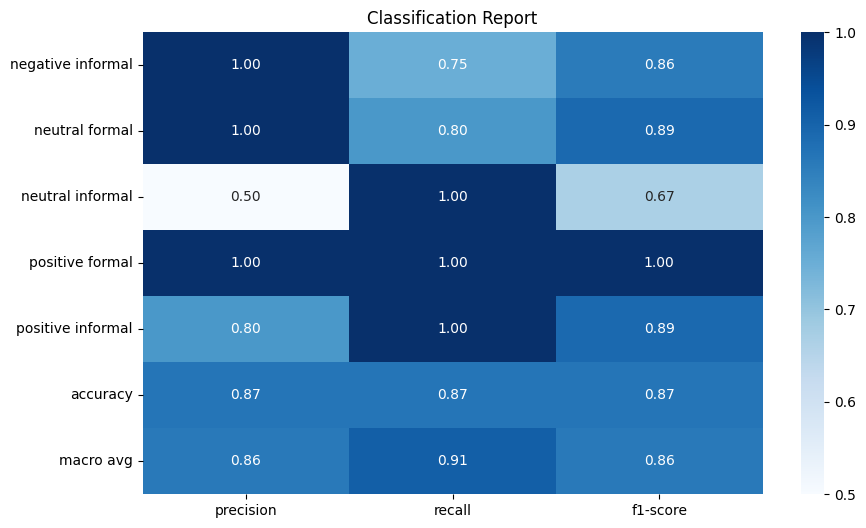

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report")
plt.show()

In [26]:
eval_df_with_pred = eval_df.copy()

In [27]:
eval_df_with_pred.to_csv('eval_df_with_pred.csv')

In [13]:
eval_df_with_pred = pd.read_csv("eval_df_with_pred.csv", index_col='Unnamed: 0')

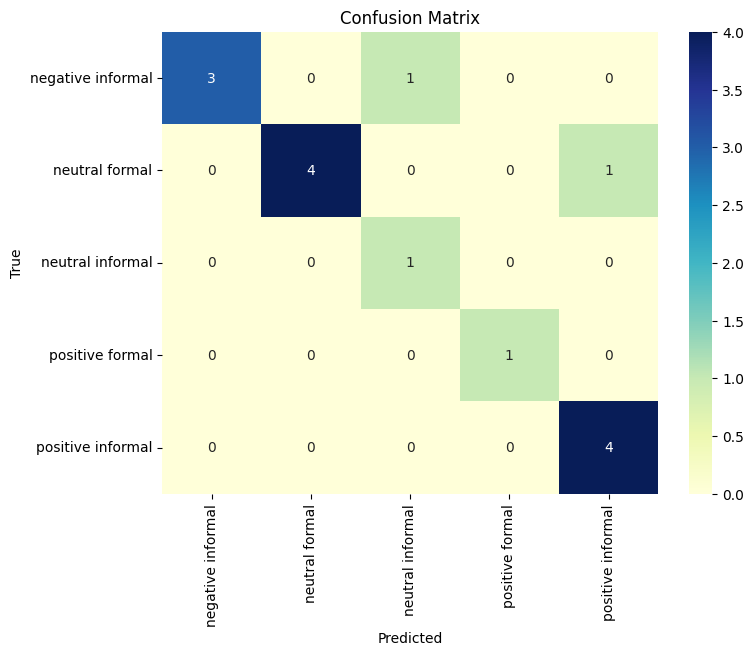

In [15]:
# Importing necessary libraries for data processing, analysis, and evaluation.
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate confusion matrix
cm = confusion_matrix(eval_df_with_pred['Label'], eval_df_with_pred['Analyzed_label'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=sorted(eval_df_with_pred['Label'].unique()), yticklabels=sorted(eval_df_with_pred['Label'].unique()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [16]:
mislabeled_rows = eval_df_with_pred.loc[eval_df_with_pred['Label'] != eval_df_with_pred['Analyzed_label']]
mislabeled_rows

,Email,Label,Analyzed_label
2,"Welcome to dbdiagram.io, a free tool that help...",neutral formal,positive informal
3,"Hi there,\n\nI'm afraid I have some bad news —...",negative informal,neutral informal
